In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import tqdm
import copy

import matplotlib.pyplot as plt
%matplotlib inline  

### Neural network

* The code is referenced from https://machinelearningmastery.com/building-a-regression-model-in-pytorch/

#### Questions 
* ref: https://stackoverflow.com/questions/68606661/what-is-difference-between-nn-module-and-nn-sequential   
1) What is the advantage to use nn.Module instead of nn.Sequential?
While nn.Module is the base class to implement PyTorch models, nn.Sequential is a quick way to define a sequential neural network structures inside or outside an existing nn.Module.

2) Which is regularly utilized to build the model?
Both are widely used.

In [2]:
# prepare data
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
print(data.feature_names)
 
X, y = data.data, data.target

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [3]:
from sklearn.model_selection import train_test_split

# train-test split of the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

In [4]:
import torch.nn as nn
 
# Define the model
model = nn.Sequential(
    nn.Linear(8, 24),
    nn.ReLU(),
    nn.Linear(24, 12),
    nn.ReLU(),
    nn.Linear(12, 6),
    nn.ReLU(),
    nn.Linear(6, 1)
)

# loss function and optimizer
loss_function = nn.MSELoss()  # mean square error
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [7]:
# training parameters
epochs = 10   # number of epochs to run
batch_size = 10  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)
 
# Hold the best model
best_mse = np.inf   # init to infinity
best_weights = None
history = []

# training loop
for epoch in range(epochs):
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=False) as bar:
    # in the training loop, each epoch is to run the forward and backward steps with the training set a few times to optimize the model weights
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            
            # forward pass
            y_pred = model(X_batch)
            loss = loss_function(y_pred, y_batch)
            
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            
            # update weights
            optimizer.step()
            
            # print progress
            bar.set_postfix(mse=float(loss))
            
    # evaluate accuracy at end of each epoch
    model.eval()
    y_pred = model(X_test)
    mse = loss_function(y_pred, y_test)
    mse = float(mse)
    history.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())

# restore model and return best accuracy
model.load_state_dict(best_weights)

Epoch 9: 100%|███████████████████████████████████████████████████████| 1445/1445 [00:05<00:00, 272.86batch/s, mse=2.98]


<All keys matched successfully>

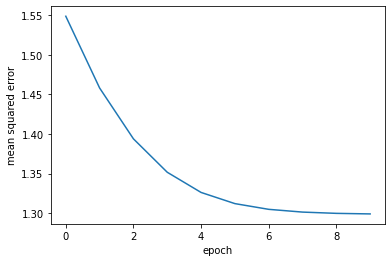

In [15]:
plt.plot(history)
plt.xlabel("epoch")
plt.ylabel("mean squared error")
plt.show()